## Zadanie 2

In [56]:
import numpy as np
from scipy.differentiate import derivative
import pandas as pd
import matplotlib.pyplot as plt

Na początku zdefiniowaliśmy funkcję
$$
f(x) = x^2 - 3x + 2 = 0
$$
oraz funkcje definujący rówanoważny schemat iteracyjny
$$
\phi _1(x) = \frac{x^2 + 2}{3}
$$
$$
\phi _2(x) = \sqrt{3x - 2}
$$
$$
\phi _3(x) = 3 - \frac{2}{x}
$$
$$
\phi _4(x) = \frac{x^2 - 2}{2x - 3}
$$

Następnie przeanalizowaliśmy zbieżność oraz rząd zbieżności schematów iteracyjnych odpowiadających funkcjom $\phi _i(x)$ dla pierwiastka $\alpha = 2$ badając wartości $|\phi` _i(2)|$. Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [57]:
f = lambda x: x**2 - 3*x + 2
alpha = 2

phi1 = lambda x: (x**2 + 2) / 3
phi2 = lambda x: np.sqrt(3*x - 2)
phi3 = lambda x: 3 - (2 / x)
phi4 = lambda x: (x**2 - 2) / (2*x - 3)

dphi1_2 = derivative(phi1, alpha).df
dphi2_2 = derivative(phi2, alpha).df
dphi3_2 = derivative(phi3, alpha).df
dphi4_2 = derivative(phi4, alpha, initial_step=0.3).df

pd.DataFrame([dphi1_2, dphi2_2, dphi3_2, dphi4_2])

,0
0,1.333333
1,0.750000
2,0.500000
3,0.000000


Można zauważyć, że tylko dla funkcji $\phi _1(x)$ mamy $|\phi` _i(2)| > 1$, co oznacza, że funkcja ta nie jest zbieżna w punkcie. Dla wszystkich pozostałych, funkcje te są zbieżne. Następnie, potwierdziliśmy to obliczając wartość miejsca zerowego funkcji $f(x)$ dla każdej z funkcji $\phi _i(x)$. W tym celu wykonaliśmy 10 iteracji w celu jak najlepszego przybliżenia wartości miejsca zerowego. Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [58]:
def test_convergence(x, phi, remaining_iter=10, result=None):
    if result is None:
        result = []
    return test_convergence(phi(x), phi, remaining_iter - 1, result + [x]) if remaining_iter != 0 else result + [x]

x0 = 3

iterationValues = np.array([test_convergence(x0, phi1), test_convergence(x0, phi2), test_convergence(x0, phi3), test_convergence(x0, phi4)])

pd.DataFrame(iterationValues.T)

,0,1,2,3
0,3.000000e+00,3.000000,3.000000,3.000000
1,3.666667e+00,2.645751,2.333333,2.333333
2,5.148148e+00,2.436648,2.142857,2.066667
3,9.501143e+00,2.304332,2.066667,2.003922
4,3.075724e+01,2.216528,2.032258,2.000015
5,3.160026e+02,2.156289,2.015873,2.000000
6,3.328655e+04,2.113970,2.007874,2.000000
7,3.693315e+08,2.083725,2.003922,2.000000
8,4.546858e+16,2.061838,2.001957,2.000000
9,6.891304e+32,2.045853,2.000978,2.000000


Jak widać na powyższej tabeli, wartości miejsc zeorwych są zgodne dla wszystkich funkcji $\phi$ poza $\phi _1(x)$, która nie jest zbieżna. Potwierdza to nasze wcześniejsze obliczenia odnośnie zbieżności poszczególnych funkcji $\phi _i(x)$. Następnie wyznaczyliśmy eksperymetalnie rząd zbieżności każdej metody iteracyjnej ze wzoru
$$
r = \frac{\ln \frac{\varepsilon_k}{\varepsilon_{k+1}}}{\ln \frac{\varepsilon_{k-1}}{\varepsilon_k}}
$$
Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [59]:
x_star = alpha 
r = []

for i in range(4):
    for k in range(1, iterationValues.shape[1] - 1):
        if i == 3 and k > 4:
            r.append(np.nan)
            continue
        vec = iterationValues[i]
        eps_vec = np.abs(vec - x_star)
        r.append(np.log(eps_vec[k] / eps_vec[k + 1]) / np.log(eps_vec[k - 1] / eps_vec[k]))
        
r = np.array(r).reshape(4, iterationValues.shape[1] - 2)
r.T

array([[1.24502127, 0.89469552, 0.77124375, 1.46497352],
       [1.36518297, 0.92262126, 0.89949484, 1.76037443],
       [1.54776622, 0.94291035, 0.95249817, 1.95858039],
       [1.77887408, 0.95772819, 0.97687199, 1.9985976 ],
       [1.95081549, 0.96860761, 0.98858466,        nan],
       [1.9973114 , 0.97663248, 0.99432867,        nan],
       [1.9999871 , 0.98257435, 0.99717332,        nan],
       [2.        , 0.98698721, 0.99858889,        nan],
       [2.        , 0.99027223, 0.999295  ,        nan]])

Następnie dla każdej z funkcji $\phi _i(x)$ obliczyliśmy wartość błędu bezwzględnego. Otrzymane wyniki przedstawiliśmy w postaci wykresu z użyciem skali logarytmicznej na osi y.

In [60]:
err = []
for i in range(4):
    for k in range(iterationValues.shape[1]):
        err.append((iterationValues[i][k] - x_star) / x_star)
        
err = np.array(err).reshape(4, iterationValues.shape[1])

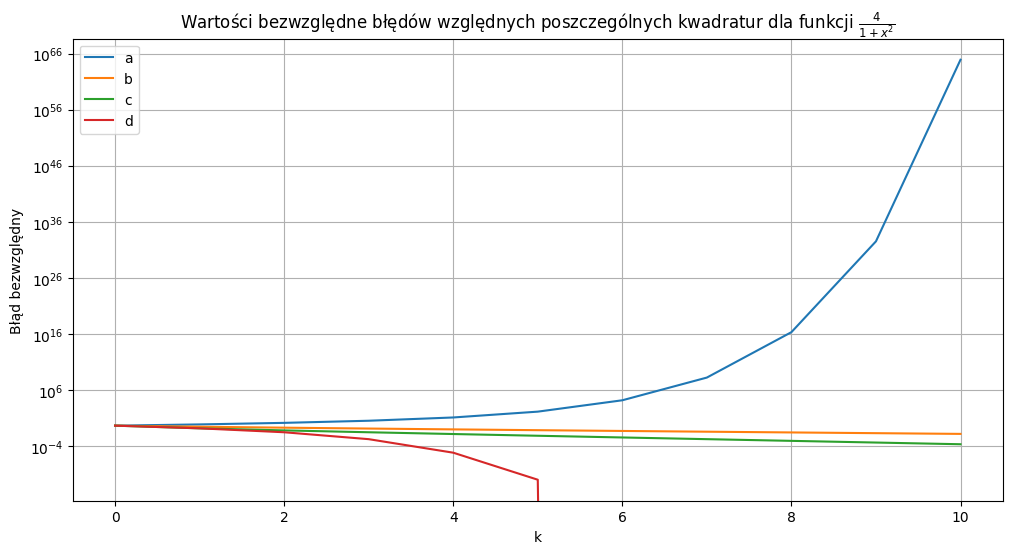

In [61]:
plt.figure(figsize=(12, 6))
plt.title("Wartości bezwzględne błędów względnych poszczególnych kwadratur dla funkcji $\\frac{4}{1+x^{2}}$")

labels = ["a", "b", "c", "d"]
for i in range(4):
    plt.semilogy(range(iterationValues.shape[1]), err[i], label=labels[i])   
plt.xlabel('k')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

Następnie wykonaliśmy wykres również dla błędu bezwzględnego, ale tylko dla funkcji zbieżnych. Wynik przedstawiliśmy poniżej.

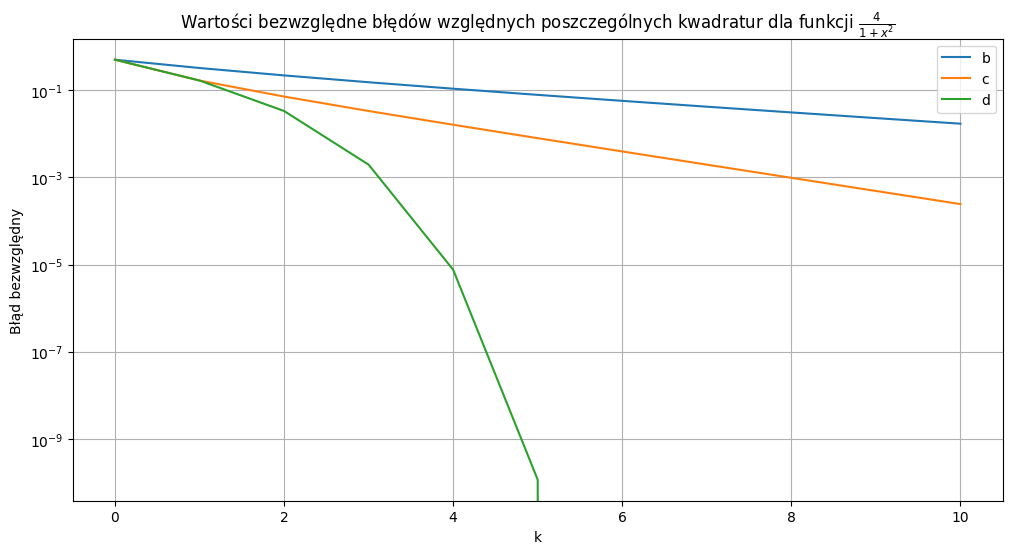

In [62]:
plt.figure(figsize=(12, 6))
plt.title("Wartości bezwzględne błędów względnych poszczególnych kwadratur dla funkcji $\\frac{4}{1+x^{2}}$")

labels = ["a", "b", "c", "d"]
for i in range(1, 4):
    plt.semilogy(range(iterationValues.shape[1]), err[i], label=labels[i])   
plt.xlabel('k')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()